In [1]:
%reload_kedro

2023-02-17 10:19:50,961 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: /Users/guilhermepalazzo/Desktop/dev/git_repositories/crypto_msc_thesis
2023-02-17 10:19:51,251 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2023-02-17 10:19:51,401 - kedro.extras.extensions.ipython - INFO - ** Kedro project crypto_thesis
2023-02-17 10:19:51,402 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df_model_rpt = catalog.load("xgboost_model_reporting")
df_y_true = catalog.load("xgboost_target_test")
df_y_pred = catalog.load("xgboost_model_predict")

2023-02-17 10:19:53,609 - kedro.io.data_catalog - INFO - Loading data from `xgboost_model_reporting` (ParquetDataSet)...
2023-02-17 10:19:53,659 - kedro.io.data_catalog - INFO - Loading data from `xgboost_target_test` (ParquetDataSet)...
2023-02-17 10:19:53,670 - kedro.io.data_catalog - INFO - Loading data from `xgboost_model_predict` (ParquetDataSet)...


In [4]:
df_y_true = df_y_true.rename(columns={"label": "y_true"})

In [5]:
df_model_rpt

,accuracy,model_params,data_interval,probas,fte_importance,target_name,volume_bar_size,bar_ahead_predict,labeling_tau,train_test_cutoff_date
0,0.485255,"{'use_label_encoder': False, 'eval_metric': 'm...",15m,"{929: {'proba_label_0': 0.06333988904953003, '...","{'log_return_accum__ETHUSDT': 51.0, 'log_retur...",BTCUSDT,50000,1,0.05,2022-07-01


In [6]:
probas = eval(df_model_rpt["probas"].values[0])

In [7]:
probas_df = pd.DataFrame.from_dict(data=probas, orient="index")
probas_df = probas_df.sort_index()

In [8]:
probas_df.head()

,proba_label_0,proba_label_1
929,0.063340,0.936660
930,0.419095,0.580905
931,0.487533,0.512467
932,0.790754,0.209246
933,0.946452,0.053548


In [9]:
df = probas_df.merge(df_y_true, left_index=True, right_index=True, how="inner")
assert df.shape[0] == probas_df.shape[0] == df_y_true.shape[0]
df2 = df.merge(df_y_pred, left_index=True, right_index=True, how="inner")
assert df.shape[0] == df2.shape[0]

In [10]:
df2.head()

,proba_label_0,proba_label_1,y_true,y_pred
929,0.063340,0.936660,0,1
930,0.419095,0.580905,0,1
931,0.487533,0.512467,0,1
932,0.790754,0.209246,1,0
933,0.946452,0.053548,1,0


In [11]:
df_right = df2[df2["y_true"] == df2["y_pred"]]
df_wrong = df2.drop(df_right.index)

In [12]:
df_right = df_right.drop(columns=["y_true"])
right_probas = df_right[["proba_label_0", "proba_label_1"]].max(axis=1)

<AxesSubplot: >

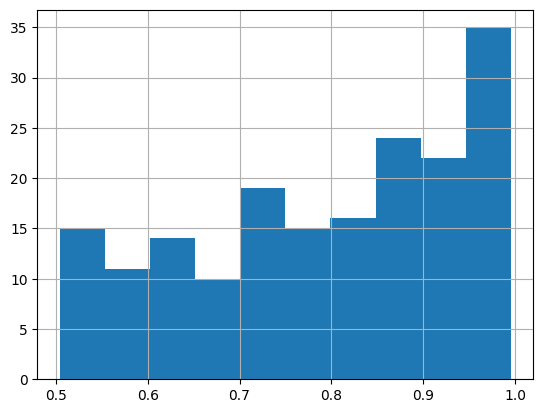

In [13]:
right_probas.hist()

In [14]:
df_wrong = df_wrong.drop(columns=["y_true"])
wrong_probas = df_wrong[["proba_label_0", "proba_label_1"]].max(axis=1)

<AxesSubplot: >

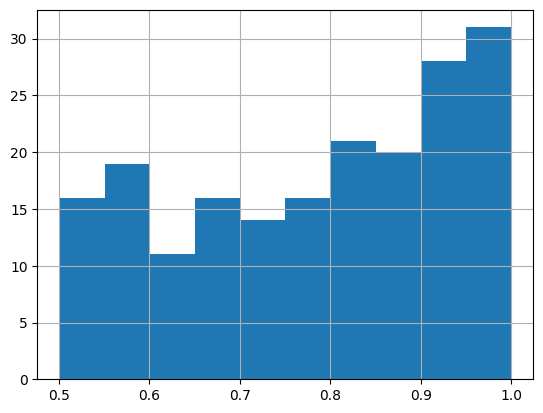

In [15]:
wrong_probas.hist()